## Import Statements

In [2]:
# General
import pandas as pd
import numpy as np
from pandas.tseries.offsets import DateOffset

# Paths and Files
from pathlib import Path
import os

# Data Processing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split


# Model development and evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Plotting
import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick # Used to reformat a plot axis as a percentage
import hvplot.pandas
import seaborn as sns

# Quality of life improvements
import warnings
warnings.filterwarnings('ignore') # Filter out warnings to improve readability

2024-01-16 18:14:48.823253: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

## Loading the Data

In [3]:
# 3-month Treasury Bonds

# Initialize an empty dataframe
three_month_treasury_bond_df = pd.DataFrame(columns=["DATE","DTB3"])

# Set the folder path
folder_path = Path("./Resources/3_month_treasury_bond")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    three_month_treasury_bond_df = pd.concat(
        [
            three_month_treasury_bond_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
three_month_treasury_bond_df.set_index('DATE', inplace=True)

# Format the index as a datetime
three_month_treasury_bond_df.index = pd.to_datetime(three_month_treasury_bond_df.index, format='%Y-%m-%d')

# Sort the values by Date ascending
three_month_treasury_bond_df.sort_values(by=['DATE'], inplace=True)

three_month_treasury_bond_df.head()

,DTB3
DATE,
1954-01-04,1.330
1954-01-05,1.280
1954-01-06,1.280
1954-01-07,1.310
1954-01-08,1.310


In [4]:
# S&P Prices

# Initialize an empty dataframe
sp500_df = pd.DataFrame(columns=["Date","Open","High","Low","Close","Adj Close","Volume"])

# Set the folder path
folder_path = Path("./Resources/sp500")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    sp500_df = pd.concat(
        [
            sp500_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
sp500_df.set_index('Date', inplace=True)

# Format the index as a datetime
sp500_df.index = pd.to_datetime(sp500_df.index, format='%Y-%m-%d')

# Sort the values by Date ascending
sp500_df.sort_values(by=['Date'], inplace=True)

sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.0,71.959999,70.709999,70.959999,70.959999,3120000
1962-01-03,0.0,71.480003,70.379997,71.129997,71.129997,3590000
1962-01-04,0.0,71.620003,70.449997,70.639999,70.639999,4450000
1962-01-05,0.0,70.839996,69.349998,69.660004,69.660004,4630000
1962-01-08,0.0,69.839996,68.169998,69.120003,69.120003,4620000


In [5]:
# T-Bill Summary

# Initialize an empty dataframe
tbill_summary_df = pd.DataFrame(columns=["date","US1M","US3M","US6M","US1Y","US2Y","US3Y","US5Y","US7Y","US10Y","US20Y","US30Y"])

# Set the folder path
folder_path = Path("./Resources/summary_spreadsheet")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    tbill_summary_df = pd.concat(
        [
            tbill_summary_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
tbill_summary_df.set_index('date', inplace=True)

# Format the index as a datetime
tbill_summary_df.index = pd.to_datetime(tbill_summary_df.index, format='%Y-%m-%d')

# Sort the values by Date ascending
tbill_summary_df.sort_values(by=['date'], inplace=True)

tbill_summary_df.head()

,US1M,US3M,US6M,US1Y,US2Y,US3Y,US5Y,US7Y,US10Y,US20Y,US30Y
date,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN


In [6]:
combined_df = pd.concat([sp500_df, tbill_summary_df, three_month_treasury_bond_df], axis=1)
combined_df.head()

,Open,High,Low,Close,Adj Close,Volume,US1M,US3M,US6M,US1Y,US2Y,US3Y,US5Y,US7Y,US10Y,US20Y,US30Y,DTB3
1954-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.330
1954-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.280
1954-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.280
1954-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.310
1954-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.310


In [7]:
combined_df = combined_df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'US1M', 'US3M', 'US6M', 'US2Y', 'US3Y', 'US5Y', 'US7Y', 'US20Y', 'US30Y'], axis=1)

In [8]:
combined_df = combined_df.dropna()


In [9]:
combined_df

,Adj Close,US1Y,US10Y,DTB3
1962-01-02,70.959999,3.22,4.06,2.700
1962-01-03,71.129997,3.24,4.03,2.730
1962-01-04,70.639999,3.24,3.99,2.720
1962-01-05,69.660004,3.26,4.02,2.740
1962-01-08,69.120003,3.31,4.03,2.780
...,...,...,...,...
2023-12-29,4769.830078,4.79,3.88,5.20
2024-01-02,4742.830078,4.80,3.95,5.22
2024-01-03,4704.810059,4.81,3.91,5.24
2024-01-04,4688.680176,4.85,3.99,5.24


In [10]:
sp500_observations_df = sp500_df[['Close','Adj Close']].copy()
sp500_observations_df['Signal_1'] = 0.0
sp500_observations_df.loc["1962-01-02":"1968-11-28", 'Signal_1'] = 1.0
sp500_observations_df.loc["1970-05-26":"1973-01-10", 'Signal_1'] = 1.0
sp500_observations_df.loc["1974-10-03":"1976-12-30", 'Signal_1'] = 1.0
sp500_observations_df.loc["1982-08-12":"1987-08-24", 'Signal_1'] = 1.0
sp500_observations_df.loc["1987-12-04":"1990-07-15", 'Signal_1'] = 1.0
sp500_observations_df.loc["1990-10-11":"2000-03-22", 'Signal_1'] = 1.0
sp500_observations_df.loc["2002-10-09":"2007-10-08", 'Signal_1'] = 1.0
sp500_observations_df.loc["2009-03-09":"2010-04-22", 'Signal_1'] = 1.0
sp500_observations_df.loc["2010-07-02":"2011-04-28", 'Signal_1'] = 1.0
sp500_observations_df.loc["2011-10-03":"2018-09-19", 'Signal_1'] = 1.0
sp500_observations_df.loc["2018-12-24":"2020-02-18", 'Signal_1'] = 1.0
sp500_observations_df.loc["2020-03-23":"2022-01-03", 'Signal_1'] = 1.0
sp500_observations_df.loc["2022-10-12":"2024-01-08", 'Signal_1'] = 1.0

sp500_observations_df = sp500_observations_df.dropna()


sp500_observations_df.head()

,Close,Adj Close,Signal_1
Date,,,
1962-01-02,70.959999,70.959999,1.0
1962-01-03,71.129997,71.129997,1.0
1962-01-04,70.639999,70.639999,1.0
1962-01-05,69.660004,69.660004,1.0
1962-01-08,69.120003,69.120003,1.0


In [11]:
# Assuming you have a dataframe with a column 'Close' representing the closing prices
# and a column 'Signal' that you want to generate

def generate_signals(combined_df, threshold_percentage=10):
    combined_df['Signal'] = 1.0  # Initialize all signals to 1.0

    for i in range(1, len(combined_df)):
        # Calculate cumulative percentage drop
        cumulative_drop = (combined_df['Adj Close'][i] - combined_df['Adj Close'][i:]) / combined_df['Adj Close'][i]

        if (cumulative_drop > threshold_percentage / 100).any():
            lowest_after_drop = combined_df['Adj Close'][i:].idxmin()
            highest_before_drop = combined_df['Adj Close'].loc[combined_df.index[i]:lowest_after_drop].idxmax()

            # Use .loc for inclusive slicing
            combined_df.loc[highest_before_drop:lowest_after_drop, 'Signal'] = 0.0

            # Prevent redundant signal assignments
            combined_df.loc[lowest_after_drop:, 'Signal'] = 1.0  # Set signals back to 1.0 from the lowest day onward

    return combined_df



combined_df_with_signals = generate_signals(combined_df, threshold_percentage=10)

# Now, sp500_data_with_signals will have the 'Signal' column updated based on your conditions

In [12]:
combined_df_with_signals = combined_df_with_signals.drop(['Adj Close'], axis = 1)

In [13]:
combined = pd.concat([combined_df_with_signals, sp500_observations_df], axis=1)
combined

,US1Y,US10Y,DTB3,Signal,Close,Adj Close,Signal_1
1962-01-02,3.22,4.06,2.700,1.0,70.959999,70.959999,1.0
1962-01-03,3.24,4.03,2.730,0.0,71.129997,71.129997,1.0
1962-01-04,3.24,3.99,2.720,0.0,70.639999,70.639999,1.0
1962-01-05,3.26,4.02,2.740,0.0,69.660004,69.660004,1.0
1962-01-08,3.31,4.03,2.780,0.0,69.120003,69.120003,1.0
...,...,...,...,...,...,...,...
2023-12-29,4.79,3.88,5.20,1.0,4769.830078,4769.830078,1.0
2024-01-02,4.80,3.95,5.22,1.0,4742.830078,4742.830078,1.0
2024-01-03,4.81,3.91,5.24,1.0,4704.810059,4704.810059,1.0
2024-01-04,4.85,3.99,5.24,1.0,4688.680176,4688.680176,1.0


In [14]:
combined = combined.drop(columns = ['Close'])
combined

,US1Y,US10Y,DTB3,Signal,Adj Close,Signal_1
1962-01-02,3.22,4.06,2.700,1.0,70.959999,1.0
1962-01-03,3.24,4.03,2.730,0.0,71.129997,1.0
1962-01-04,3.24,3.99,2.720,0.0,70.639999,1.0
1962-01-05,3.26,4.02,2.740,0.0,69.660004,1.0
1962-01-08,3.31,4.03,2.780,0.0,69.120003,1.0
...,...,...,...,...,...,...
2023-12-29,4.79,3.88,5.20,1.0,4769.830078,1.0
2024-01-02,4.80,3.95,5.22,1.0,4742.830078,1.0
2024-01-03,4.81,3.91,5.24,1.0,4704.810059,1.0
2024-01-04,4.85,3.99,5.24,1.0,4688.680176,1.0


In [15]:
# Check data types
print(combined.dtypes)

# Convert string columns to numeric types, if needed
combined['US10Y'] = combined['US10Y'].astype(float)  # Example conversion
combined['DTB3'] = combined['DTB3'].astype(float)  # Example conversion
combined['US1Y'] = combined['US1Y'].astype(float)  # Example conversion

# Handle missing values (if applicable)
combined.fillna(method='ffill', inplace=True)  # Example imputation

# Perform calculations
combined['yeild curve 1'] = combined['US10Y'] / combined['DTB3']
combined['yeild curve 2'] = combined['US10Y'] / combined['US1Y']

columns_to_round = ['yeild curve 1', 'yeild curve 2']
combined[columns_to_round] = combined[columns_to_round].round(3)

print(combined)  # View the DataFrame with new columns

US1Y         float64
US10Y        float64
DTB3          object
Signal       float64
Adj Close    float64
Signal_1     float64
dtype: object
            US1Y  US10Y  DTB3  Signal    Adj Close  Signal_1  yeild curve 1  \
1962-01-02  3.22   4.06  2.70     1.0    70.959999       1.0          1.504   
1962-01-03  3.24   4.03  2.73     0.0    71.129997       1.0          1.476   
1962-01-04  3.24   3.99  2.72     0.0    70.639999       1.0          1.467   
1962-01-05  3.26   4.02  2.74     0.0    69.660004       1.0          1.467   
1962-01-08  3.31   4.03  2.78     0.0    69.120003       1.0          1.450   
...          ...    ...   ...     ...          ...       ...            ...   
2023-12-29  4.79   3.88  5.20     1.0  4769.830078       1.0          0.746   
2024-01-02  4.80   3.95  5.22     1.0  4742.830078       1.0          0.757   
2024-01-03  4.81   3.91  5.24     1.0  4704.810059       1.0          0.746   
2024-01-04  4.85   3.99  5.24     1.0  4688.680176       1.0          

In [16]:
combined

,US1Y,US10Y,DTB3,Signal,Adj Close,Signal_1,yeild curve 1,yeild curve 2
1962-01-02,3.22,4.06,2.70,1.0,70.959999,1.0,1.504,1.261
1962-01-03,3.24,4.03,2.73,0.0,71.129997,1.0,1.476,1.244
1962-01-04,3.24,3.99,2.72,0.0,70.639999,1.0,1.467,1.231
1962-01-05,3.26,4.02,2.74,0.0,69.660004,1.0,1.467,1.233
1962-01-08,3.31,4.03,2.78,0.0,69.120003,1.0,1.450,1.218
...,...,...,...,...,...,...,...,...
2023-12-29,4.79,3.88,5.20,1.0,4769.830078,1.0,0.746,0.810
2024-01-02,4.80,3.95,5.22,1.0,4742.830078,1.0,0.757,0.823
2024-01-03,4.81,3.91,5.24,1.0,4704.810059,1.0,0.746,0.813
2024-01-04,4.85,3.99,5.24,1.0,4688.680176,1.0,0.761,0.823


In [17]:
# Calculate the 10-day rolling mean of "Adj Close"
rolling_mean = combined["Adj Close"].rolling(window=10).mean()


# Calculate the volatility and create the new column
combined["Volatility"] = combined["Adj Close"] / rolling_mean

In [18]:
com_results_df = pd.DataFrame(combined_df['Adj Close'].pct_change())

com_results_df['ideal_returns_auto'] = combined_df['Adj Close'].pct_change() * combined_df['Signal'].shift()

com_results_df.head(50)

,Adj Close,ideal_returns_auto
1962-01-02,NaN,NaN
1962-01-03,0.002396,0.002396
1962-01-04,-0.006889,-0.000000
1962-01-05,-0.013873,-0.000000
1962-01-08,-0.007752,-0.000000
1962-01-09,0.000434,0.000000
1962-01-10,-0.002748,-0.000000
1962-01-11,0.005946,0.000000
1962-01-12,0.003460,0.000000
1962-01-15,-0.002011,-0.000000


<Axes: >

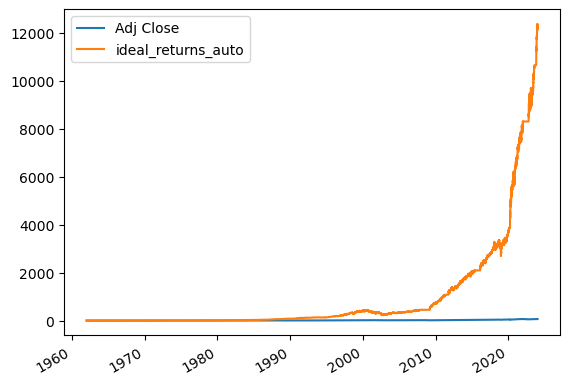

In [19]:
(1+com_results_df).cumprod().plot()

In [20]:
combined = combined.dropna()
combined


,US1Y,US10Y,DTB3,Signal,Adj Close,Signal_1,yeild curve 1,yeild curve 2,Volatility
1962-01-15,3.32,4.10,2.74,0.0,69.470001,1.0,1.496,1.235,0.995172
1962-01-16,3.30,4.13,2.73,0.0,69.070000,1.0,1.513,1.252,0.992128
1962-01-17,3.30,4.12,2.74,0.0,68.320000,1.0,1.504,1.248,0.985332
1962-01-18,3.27,4.11,2.71,0.0,68.389999,1.0,1.517,1.257,0.989553
1962-01-19,3.27,4.11,2.71,0.0,68.750000,1.0,1.517,1.257,0.996074
...,...,...,...,...,...,...,...,...,...
2023-12-29,4.79,3.88,5.20,1.0,4769.830078,1.0,0.746,0.810,1.003386
2024-01-02,4.80,3.95,5.22,1.0,4742.830078,1.0,0.757,0.823,0.997210
2024-01-03,4.81,3.91,5.24,1.0,4704.810059,1.0,0.746,0.813,0.989960
2024-01-04,4.85,3.99,5.24,1.0,4688.680176,1.0,0.761,0.823,0.988223


In [21]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [22]:
# Extract features and target variable
features = combined[['US1Y', 'US10Y', 'DTB3', 'yeild curve 1', 'yeild curve 2', 'Volatility']]
target = combined['Signal_1']

In [23]:
display(target)

1962-01-15    1.0
1962-01-16    1.0
1962-01-17    1.0
1962-01-18    1.0
1962-01-19    1.0
             ... 
2023-12-29    1.0
2024-01-02    1.0
2024-01-03    1.0
2024-01-04    1.0
2024-01-05    1.0
Name: Signal_1, Length: 15601, dtype: float64

In [24]:
# Split the data into training and testing sets based on dates
train_data = combined.loc['1962-01-02':'2010-01-01']
test_data = combined.loc['2010-01-02':'2024-01-08']

X_train, y_train = train_data[['US1Y', 'US10Y', 'DTB3', 'yeild curve 1', 'yeild curve 2', 'Volatility']], train_data['Signal_1']
X_test, y_test = test_data[['US1Y', 'US10Y', 'DTB3', 'yeild curve 1', 'yeild curve 2', 'Volatility']], test_data['Signal_1']

In [25]:
display(train_data)
display(test_data)

,US1Y,US10Y,DTB3,Signal,Adj Close,Signal_1,yeild curve 1,yeild curve 2,Volatility
1962-01-15,3.32,4.10,2.74,0.0,69.470001,1.0,1.496,1.235,0.995172
1962-01-16,3.30,4.13,2.73,0.0,69.070000,1.0,1.513,1.252,0.992128
1962-01-17,3.30,4.12,2.74,0.0,68.320000,1.0,1.504,1.248,0.985332
1962-01-18,3.27,4.11,2.71,0.0,68.389999,1.0,1.517,1.257,0.989553
1962-01-19,3.27,4.11,2.71,0.0,68.750000,1.0,1.517,1.257,0.996074
...,...,...,...,...,...,...,...,...,...
2009-12-24,0.43,3.82,0.05,1.0,1126.479980,1.0,76.400,8.884,1.013448
2009-12-28,0.47,3.85,0.11,1.0,1127.780029,1.0,35.000,8.191,1.012671
2009-12-29,0.47,3.82,0.10,1.0,1126.199951,1.0,38.200,8.128,1.010155
2009-12-30,0.45,3.80,0.05,1.0,1126.420044,1.0,76.000,8.444,1.008680


,US1Y,US10Y,DTB3,Signal,Adj Close,Signal_1,yeild curve 1,yeild curve 2,Volatility
2010-01-04,0.45,3.85,0.08,1.0,1132.989990,1.0,48.125,8.556,1.010687
2010-01-05,0.41,3.77,0.07,1.0,1136.520020,1.0,53.857,9.195,1.010766
2010-01-06,0.40,3.85,0.06,1.0,1137.140015,1.0,64.167,9.625,1.009245
2010-01-07,0.40,3.85,0.05,1.0,1141.689941,1.0,77.000,9.625,1.011158
2010-01-08,0.37,3.83,0.05,1.0,1144.979980,1.0,76.600,10.351,1.011887
...,...,...,...,...,...,...,...,...,...
2023-12-29,4.79,3.88,5.20,1.0,4769.830078,1.0,0.746,0.810,1.003386
2024-01-02,4.80,3.95,5.22,1.0,4742.830078,1.0,0.757,0.823,0.997210
2024-01-03,4.81,3.91,5.24,1.0,4704.810059,1.0,0.746,0.813,0.989960
2024-01-04,4.85,3.99,5.24,1.0,4688.680176,1.0,0.761,0.823,0.988223


In [26]:
# Standardize the features
scaler = StandardScaler()

X_train_clipped = np.clip(X_train, -5, 5) 
X_test_clipped = np.clip(X_test, -5, 5)
# Adjust clipping range as needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clipped)
X_test_scaled = scaler.transform(X_test_clipped)




In [27]:
# Reshape the data for LSTM input (samples, time steps, features)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [28]:
# Build an LSTM model
model = Sequential()
model.add(LSTM(10, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/10000
302/302 [==============================] - 2s 3ms/step - loss: 0.6045 - accuracy: 0.7377 - val_loss: 0.9461 - val_accuracy: 0.6070
Epoch 2/10000
302/302 [==============================] - 1s 2ms/step - loss: 0.4746 - accuracy: 0.7799 - val_loss: 1.8908 - val_accuracy: 0.6286
Epoch 3/10000
302/302 [==============================] - 1s 2ms/step - loss: 0.4064 - accuracy: 0.8356 - val_loss: 2.4840 - val_accuracy: 0.6398
Epoch 4/10000
302/302 [==============================] - 1s 3ms/step - loss: 0.3810 - accuracy: 0.8523 - val_loss: 2.6572 - val_accuracy: 0.6410
Epoch 5/10000
302/302 [==============================] - 1s 3ms/step - loss: 0.3698 - accuracy: 0.8546 - val_loss: 2.5667 - val_accuracy: 0.6484
Epoch 6/10000
302/302 [==============================] - 1s 3ms/step - loss: 0.3628 - accuracy: 0.8520 - val_loss: 2.5557 - val_accuracy: 0.6277
Epoch 7/10000
302/302 [==============================] - 1s 3ms/step - loss: 0.3578 - accuracy: 0.8519 - val_loss: 2.5834 - val_ac

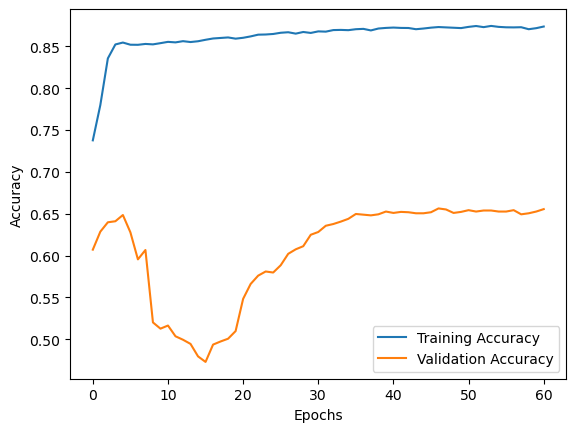

In [30]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=60, restore_best_weights=True)



# Train the model and capture the training history
history = model.fit(X_train_reshaped, y_train, epochs=10000, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Plot the training accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
# Train the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
302/302 [==============================] - 2s 7ms/step - loss: 0.4861 - accuracy: 0.7637 - val_loss: 2.1592 - val_accuracy: 0.6257
Epoch 2/30
302/302 [==============================] - 2s 7ms/step - loss: 0.4262 - accuracy: 0.8152 - val_loss: 2.7433 - val_accuracy: 0.6348
Epoch 3/30
302/302 [==============================] - 2s 7ms/step - loss: 0.3898 - accuracy: 0.8480 - val_loss: 3.0860 - val_accuracy: 0.6460
Epoch 4/30
302/302 [==============================] - 2s 7ms/step - loss: 0.3707 - accuracy: 0.8539 - val_loss: 3.0083 - val_accuracy: 0.6460
Epoch 5/30
302/302 [==============================] - 2s 7ms/step - loss: 0.3610 - accuracy: 0.8534 - val_loss: 2.9967 - val_accuracy: 0.6455
Epoch 6/30
302/302 [==============================] - 2s 7ms/step - loss: 0.3551 - accuracy: 0.8525 - val_loss: 2.9849 - val_accuracy: 0.6484
Epoch 7/30
302/302 [==============================] - 2s 7ms/step - loss: 0.3512 - accuracy: 0.8524 - val_loss: 2.9540 - val_accuracy: 0.6493
Epoch 

In [32]:
# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_reshaped)
y_pred = (y_pred_proba > 0.5).astype(int)

111/111 [==============================] - 2s 7ms/step


<Axes: >

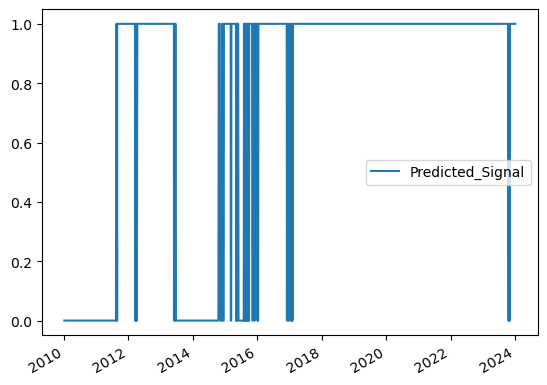

In [33]:
# Convert predictions to DataFrame with the corresponding index
predictions_df = pd.DataFrame(data={'Predicted_Signal': y_pred.flatten()}, index=test_data.index)
predictions_df.plot()

In [34]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.686046511627907


In [35]:
# Optionally, you can merge the predicted signals with the test data
result_df = pd.concat([test_data, predictions_df], axis=1)

In [36]:
result_df

,US1Y,US10Y,DTB3,Signal,Adj Close,Signal_1,yeild curve 1,yeild curve 2,Volatility,Predicted_Signal
2010-01-04,0.45,3.85,0.08,1.0,1132.989990,1.0,48.125,8.556,1.010687,0
2010-01-05,0.41,3.77,0.07,1.0,1136.520020,1.0,53.857,9.195,1.010766,0
2010-01-06,0.40,3.85,0.06,1.0,1137.140015,1.0,64.167,9.625,1.009245,0
2010-01-07,0.40,3.85,0.05,1.0,1141.689941,1.0,77.000,9.625,1.011158,0
2010-01-08,0.37,3.83,0.05,1.0,1144.979980,1.0,76.600,10.351,1.011887,0
...,...,...,...,...,...,...,...,...,...,...
2023-12-29,4.79,3.88,5.20,1.0,4769.830078,1.0,0.746,0.810,1.003386,1
2024-01-02,4.80,3.95,5.22,1.0,4742.830078,1.0,0.757,0.823,0.997210,1
2024-01-03,4.81,3.91,5.24,1.0,4704.810059,1.0,0.746,0.813,0.989960,1
2024-01-04,4.85,3.99,5.24,1.0,4688.680176,1.0,0.761,0.823,0.988223,1


In [37]:
results_df = pd.DataFrame(result_df['Adj Close'].pct_change())

results_df['models_returns'] = result_df['Adj Close'].pct_change() * result_df['Predicted_Signal'].shift()

results_df.head(50)

,Adj Close,models_returns
2010-01-04,NaN,NaN
2010-01-05,0.003116,0.0
2010-01-06,0.000546,0.0
2010-01-07,0.004001,0.0
2010-01-08,0.002882,0.0
2010-01-11,0.001747,0.0
2010-01-12,-0.009381,-0.0
2010-01-13,0.008326,0.0
2010-01-14,0.002426,0.0
2010-01-15,-0.010823,-0.0


<Axes: >

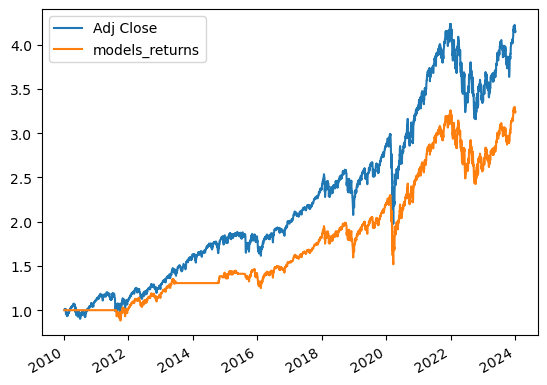

In [38]:
(1+results_df).cumprod().plot()

In [39]:
confusion_matrix(y_test, result_df['Predicted_Signal'])

array([[ 127,  312],
       [ 795, 2292]])